# 주제: 게임 업데이트에 따른 동시 접속자 수 추이

- 학번: 2024105233
- 학과: 소프트웨어융합학과
- 학년: 1
- 이름: 고윤석

## 목차
1. 주제 선정 이유
2. 가설 정의
3. 데이터 내용 및 출처
4. 데이터 가공
5. 결과 분석
6. 결론
7. 참고 문헌

## 1. 주제 선정 이유
 유저가 게임을 즐기려면 구매가 필수인 유료 게임들은 이 게임과 이 게임의 확장판을 소지하고 있는 유저의 수가 곧 매출이기에 계속해서 유저가 이 게임을 하게 할 필요는 없다. 하지만 무료 게임 (부분 유료 게임)은 이용 자체는 무료이기에 매출을 위해 유저가 지속적으로 인게임 재화를 사게 할 필요가 있어 유저를 이 게임에 오래 머무르게 해야 한다. 이 둘의 차이를 시간에 따른 동시 접속사의 수를 통해 분석해보겠다.

## 2. 가설 정의: 
 1. 무료 게임이 유료 게임보다 동시 접속자의 수가 높다.
 2. 대규모 업데이트와 같이 게임에 큰 변화 시 동시 접속자의 수가 급등한다.
 3. 시간이 지남에 따라 동시 접속자의 수가 천천히 감소한다.
 4. 업데이트 당일 동시 접속자의 수가 증가한다.

## 3. 데이터 내용 및 출처
시간에 따른 동시 접속자 수: https://data.mendeley.com/datasets/ycy3sy3vj2/1/files/c78f8614-23c8-4433-a3ec-7fea1353c15c
 - 게임들의 시간에 따른 동시 접속자 수를 표기한 데이터를 담은 폴더. 파일 이름이 게임 이름이 아닌 앱 ID로 되어있으므로 4-1의 게임 정보 표 참조

게임 정보: https://data.mendeley.com/datasets/ycy3sy3vj2/1/files/f3bd0df3-5455-4fbf-bb67-7acecfc8910f
 - 각 게임의 고유 ID, 종류, 이름, 출시일, 무료 여부를 표기한 데이터
 
 모든 파일 형식은 csv임. 

## 4. 데이터 가공

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

info=pd.read_csv("./applicationInformation.csv",encoding="cp949") 

ark=pd.read_csv("./346110.csv",encoding="cp949")
nms=pd.read_csv("./275850.csv",encoding="cp949")
dota=pd.read_csv("./570.csv",encoding="cp949")
cs=pd.read_csv("./730.csv",encoding="cp949")

### 4-1. 게임 정보

In [2]:
info

,appid,type,name,releasedate,freetoplay
0,578080,game,PLAYERUNKNOWN'S BATTLEGROUNDS,21-Dec-17,0.0
1,570,game,Dota 2,09-Jul-13,1.0
2,730,game,Counter-Strike: Global Offensive,21-Aug-12,1.0
3,622590,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS (Test Server),NaN,NaN
4,359550,game,Tom Clancy's Rainbow Six Siege,01-Dec-15,0.0
...,...,...,...,...,...
1995,34000,advertising,Football Manager 2010,29-Oct-09,1.0
1996,202480,NaN,Skyrim Creation Kit,NaN,NaN
1997,429050,game,Feed and Grow: Fish,08-Jan-16,0.0
1998,209650,game,Call of Duty: Advanced Warfare,03-Nov-14,0.0


In [3]:
# 사용할 게임의 정보만 표시
infor = info.loc[[1,2,12,272],:]
infor = infor.reset_index()

# 무료 여부를 (1, 0)형식에서 (Y, N)형식으로 변경
infor['freetoplay'] = infor['freetoplay'].astype(str) 
infor['freetoplay'] = infor['freetoplay'].str.replace('1.0','Y')
infor['freetoplay'] = infor['freetoplay'].str.replace('0.0','N')

# 불필요한 열 제거
del infor['index']
del infor['type']

infor

,appid,name,releasedate,freetoplay
0,570,Dota 2,09-Jul-13,Y
1,730,Counter-Strike: Global Offensive,21-Aug-12,Y
2,346110,ARK: Survival Evolved,27-Aug-17,N
3,275850,No Man's Sky,12-Aug-16,N


### 4-2. 게임의 동시 접속자 수

In [4]:
# 게임 파일을 하나로 모은 리스트
gamelist = [dota, cs, ark, nms]

# 각 표에 시간을 년도, 달, 날짜로 바꾸어 추가
for i in gamelist:
    i["Year"] = i["Time"].str[:4]
for i in gamelist:
    i["Month"] = i["Time"].str[:7]
for i in gamelist:
    i["Date"] = i["Time"].str[:10]

# 각 표에 자신의 게임 이름, 무료 여부를 추가
a = 0
for i in gamelist:
    i["name"] = infor['name'][a]
    i["freetoplay"] = infor["freetoplay"][a]
    a += 1

# 모든 표를 하나로 합치기
hp1 = pd.concat(gamelist, axis = 0)

hp1

,Time,Playercount,Year,Month,Date,name,freetoplay
0,2017-12-14 00:00,283932.0,2017,2017-12,2017-12-14,Dota 2,Y
1,2017-12-14 00:05,279750.0,2017,2017-12,2017-12-14,Dota 2,Y
2,2017-12-14 00:10,275154.0,2017,2017-12,2017-12-14,Dota 2,Y
3,2017-12-14 00:15,270734.0,2017,2017-12,2017-12-14,Dota 2,Y
4,2017-12-14 00:20,265440.0,2017,2017-12,2017-12-14,Dota 2,Y
...,...,...,...,...,...,...,...
280219,2020-08-12 23:35,6876.0,2020,2020-08,2020-08-12,No Man's Sky,N
280220,2020-08-12 23:40,6903.0,2020,2020-08,2020-08-12,No Man's Sky,N
280221,2020-08-12 23:45,6910.0,2020,2020-08,2020-08-12,No Man's Sky,N
280222,2020-08-12 23:50,6895.0,2020,2020-08,2020-08-12,No Man's Sky,N


## 5. 분석 결과

### 5-1. 가설 1 분석 결과
- 가설 1: 무료 게임이 유료 게임보다 동시 접속자의 수가 높다.

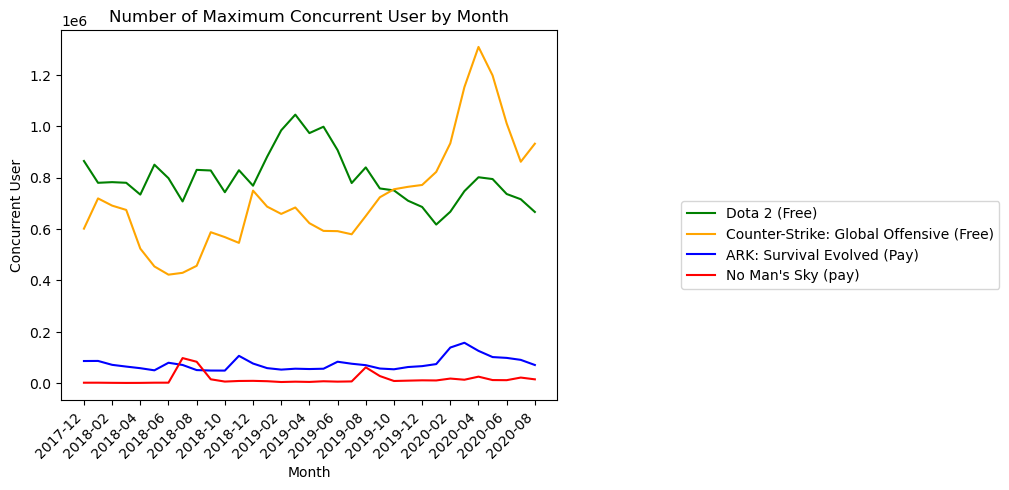

In [5]:
fig, pt = plt.subplots()

#2027-12 부터 2020-08까지의 동시 접속자 데이터 그래프로 표시
pt.plot(hp1[hp1['name'] == dota['name'][0]].groupby('Month')['Playercount'].max(), color = 'green', label = dota['name'][0] + ' (Free)')
pt.plot(hp1[hp1['name'] == cs['name'][0]].groupby('Month')['Playercount'].max(), color = 'orange', label = cs['name'][0] + ' (Free)')
pt.plot(hp1[hp1['name'] == ark['name'][0]].groupby('Month')['Playercount'].max(), color = 'blue', label = ark['name'][0] + ' (Pay)')
pt.plot(hp1[hp1['name'] == nms['name'][0]].groupby('Month')['Playercount'].max(), color = 'red', label = nms['name'][0] + ' (pay)')
plt.legend(loc=(1.25, 0.3))

# 차트 제목
pt.set_title('Number of Maximum Concurrent User by Month')
# x축 '월'
pt.set_xlabel('Month')
pt.set_xticks(['2017-12', '2018-02', '2018-04', '2018-06', '2018-08', '2018-10', '2018-12', '2019-02', '2019-04', '2019-06', '2019-08', '2019-10', '2019-12', '2020-02', '2020-04', '2020-06', '2020-08'])
plt.xticks(rotation=45, ha='right')
# y축 '동시 접속자'
pt.set_ylabel('Concurrent User')
pt.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])

plt.show()

#### 그래프 분석:
- 4-1에서 두 무료 게임 모두 두 유료 게임보다 먼저 출시했음에도 불구하고 높은 동시 접속자 수를 가지고 있다.

### 5-2. 가설 1 분석 결과
- 가설 2: 대규모 업데이트와 같이 게임에 큰 변화 시 동시 접속자의 수가 급등한다.

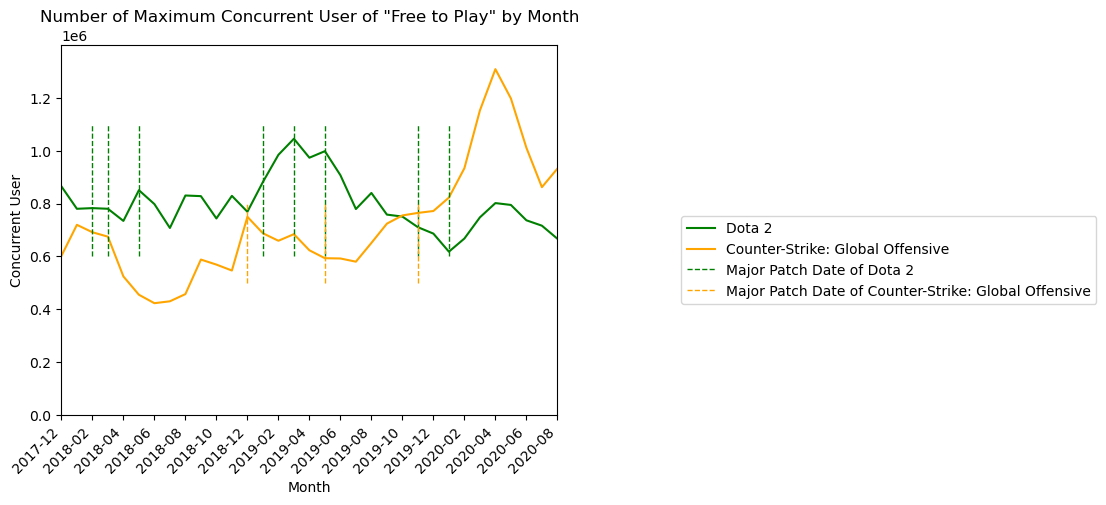

In [6]:
fig, pt = plt.subplots()

#동시 접속자 데이터 그래프로 표시
pt.plot(hp1[hp1['name'] == dota['name'][0]].groupby('Month')['Playercount'].max(), color = 'green', label = dota['name'][0])
pt.plot(hp1[hp1['name'] == cs['name'][0]].groupby('Month')['Playercount'].max(), color = 'orange', label = cs['name'][0])

# 업데이트 기간 표시
plt.vlines(['2018-02', '2018-03', '2018-05','2019-01', '2019-03', '2019-05', '2019-11', '2020-01'], 600000, 1100000, color='green', linestyle='--', linewidth=1, label= 'Major Patch Date of ' + dota['name'][0])
plt.vlines(['2018-12', '2019-05', '2019-11'], 500000, 800000, color='orange', linestyle='--', linewidth=1, label= 'Major Patch Date of ' + cs['name'][0])

plt.legend(loc=(1.25, 0.3))

# 차트 제목
pt.set_title('Number of Maximum Concurrent User of "Free to Play" by Month')

# x축 '월'
pt.set_xlabel('Month')
plt.xticks(rotation=45, ha='right')
pt.set_xticks(['2017-12', '2018-02', '2018-04', '2018-06', '2018-08', '2018-10', '2018-12', '2019-02', '2019-04', '2019-06', '2019-08', '2019-10', '2019-12', '2020-02', '2020-04', '2020-06', '2020-08'])
plt.xlim(['2017-12', '2020-08'])

# y축 '동시 접속자'
pt.set_ylabel('Concurrent User')
pt.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])
plt.ylim([0, 1400000])

plt.show()

#### 그래프 분석:
- 두 게임 다 대부분 대규모 업데이트를 했을 때 동시 접속자 수가 그 전 달보다 소폭 증가한다.
- 그러나 대규모 업데이트를 한 달의 동시 접속자 수가 감소한 달 역시 소량 존재한다.

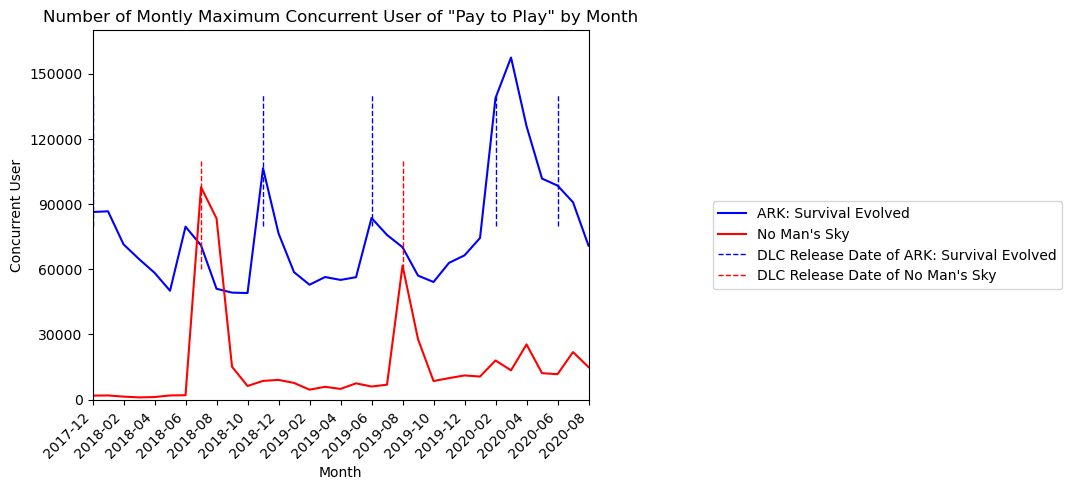

In [7]:
fig, pt = plt.subplots()

#동시 접속자 데이터 그래프로 표시
pt.plot(hp1[hp1['name'] == ark['name'][0]].groupby('Month')['Playercount'].max(), color = 'blue', label = ark['name'][0])
pt.plot(hp1[hp1['name'] == nms['name'][0]].groupby('Month')['Playercount'].max(), color = 'red', label = nms['name'][0])

# 업데이트 기간 표시
plt.vlines(['2017-12', '2018-11', '2019-06', '2020-02', '2020-06'], 80000, 140000, color='blue', linestyle='--', linewidth=1, label= 'DLC Release Date of ' + ark['name'][0])
plt.vlines(['2018-07', '2019-08'], 60000, 110000, color='red', linestyle='--', linewidth=1, label= 'DLC Release Date of ' + nms['name'][0])

plt.legend(loc=(1.25, 0.3))

# 차트 제목
pt.set_title('Number of Montly Maximum Concurrent User of "Pay to Play" by Month')

# x축 '월'
pt.set_xlabel('Month')
pt.set_xticks(['2017-12', '2018-02', '2018-04', '2018-06', '2018-08', '2018-10', '2018-12', '2019-02', '2019-04', '2019-06', '2019-08', '2019-10', '2019-12', '2020-02', '2020-04', '2020-06', '2020-08'])
plt.xticks(rotation=45, ha='right')
plt.xlim(['2017-12', '2020-08'])

# y축 '동시 접속자'
pt.set_ylabel('Concurrent User')
pt.set_yticks([0, 30000, 60000, 90000, 120000, 150000])
plt.ylim([0, 170000])

plt.show()

#### 그래프 분석:
- 두 게임 다 대규모 업데이트를 했을 때 동시 접속자 수가 그 전 달보다 대폭 증가한다.
- 그러나 이 후 동시 접속자 수가 다시 급격히 떨어져 원 상태로 복구 된다.

### 5-3. 가설 3, 4 분석 결과
- 가설 3: 시간이 지남에 따라 동시 접속자의 수가 천천히 감소한다.
- 가설 4: 업데이트 당일 동시 접속자의 수가 증가한다.

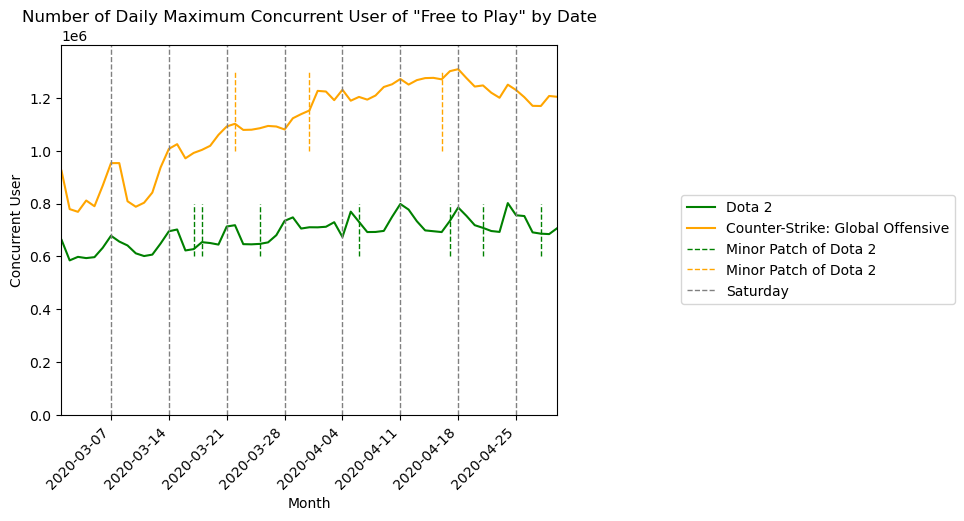

In [8]:
fig, pt = plt.subplots()

#동시 접속자 데이터 그래프로 표시
pt.plot(hp1[hp1['name'] == dota['name'][0]].groupby('Date')['Playercount'].max(), color = 'green', label = dota['name'][0])
pt.plot(hp1[hp1['name'] == cs['name'][0]].groupby('Date')['Playercount'].max(), color = 'orange', label = cs['name'][0])

# 업데이트 기간 표시
plt.vlines(['2020-03-17', '2020-03-18', '2020-03-25', '2020-04-06', '2020-04-17', '2020-04-21', '2020-04-28'], 600000, 800000, color='green', linestyle='--', linewidth=1, label= 'Minor Patch of ' + dota['name'][0])
plt.vlines(['2020-03-22', '2020-03-31', '2020-04-16'], 1000000, 1300000, color='orange', linestyle='--', linewidth=1, label= 'Minor Patch of ' + dota['name'][0])

#토요일 표시
plt.vlines(['2020-03-07', '2020-03-14', '2020-03-21', '2020-03-28', '2020-04-04', '2020-04-11', '2020-04-18', '2020-04-25'], 0, 1500000, color='grey', linestyle='--', linewidth=1, label= 'Saturday')

plt.legend(loc=(1.25, 0.3))

# 차트 제목
pt.set_title('Number of Daily Maximum Concurrent User of "Free to Play" by Date')

# x축 '일' 2020-03-01 부터 2020-04-30 까지
plt.xticks(rotation=45, ha='right')
pt.set_xlabel('Month')
pt.set_xticks(['2020-03-07', '2020-03-14', '2020-03-21', '2020-03-28', '2020-04-04', '2020-04-11', '2020-04-18', '2020-04-25'])
plt.xlim(['2020-03-01', '2020-04-30'])

# y축 '동시 접속자'
pt.set_ylabel('Concurrent User')
pt.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])
plt.ylim([0, 1400000])

plt.show()

#### 그래프 분석:
- 시간이 지남에 따라 동시 접속자 수의 변화가 불규칙하다.
- 토요일, 일요일에 동시 접속자 수가 급등한다.
- 소규모 업데이트 당일 동시 접속자 수가 주말을 제외하였을 때 그 전날보다 증가한다.

## 6. 결론
무료 게임과 유료 게임의 시간에 따른 동시 접속자 수를 분석해 보았다. 
- 무료 게임의 동시 접속자 수가 유료 게임의 동시 접속자 수보다 높았다. (가설 1 맞음)
- 대규모 업데이트 시 무료 게임의 동시 접속자 수는 낮은 폭으로 천천히 증가한 반면 유료 게임은 동시 접속자 수가 급격히 증가하였다 다시 급격히 감소하였다. (가설 2 맞음) <br>

이는 인게임 재화를 지속적으로 판매하는 무료 게임과 이 게임과 이 게임의 확장판의 소지자 수가 수익인 유료 게임의 매출 목적과 일치하다고 본다.

- 시간이 지남에 따라 동시 접속자 수의 변화가 불규칙하다. (가설 3 불확실)
- 소규모 업데이트 당일 동시 접속자의 수가 증가하였다. (가설 4 맞음) <br>

무료 게임의 동시 접속자 수가 시간에 따라 감소하는지는 알 수 없지만, 업데이트 시에 증가하는 것을 볼 때 무료 게임이 유저를 오래 잡아두기 위해서는 잦은 업데이트가 필요하다는 것을 알 수 있다.
추가로 무료 게임의 동시 접속자 수가 주말에 급등하는 것을 통해 유저가 휴일에 게임을 자주하는 것을 알 수 있다.

## 7. 참고 문헌
- Matplotlib 사용 방법: <br>
https://wikidocs.net/book/5011

- 무료 게임의 대규모 업데이트 날짜: <br>
https://steamdb.info/app/730/patchnotes/ <br>
https://steamdb.info/app/570/patchnotes/

- 유료 게임의 대규모 업데이트 날짜: <br>
https://ark.fandom.com/wiki/DLCs?so=search <br>
https://nomanssky.fandom.com/wiki/Patch_notes?so=search#Initial_Release_1.00 

- 무료 게임의 소규모 업데이트 날짜: <br>
https://dota2.fandom.com/wiki/Game_Versions <br>
https://counterstrike.fandom.com/wiki/Counter-Strike:_Global_Offensive_patches